Let's start here! If you can directly link to an image relevant to your notebook, such as [canonical logos](https://github.com/numpy/numpy/blob/main/doc/source/_static/numpylogo.svg), do so here at the top of your notebook. You can do this with Markdown syntax,

> `![<image title>](http://link.com/to/image.png "image alt text")`

or edit this cell to see raw HTML `img` demonstration. This is preferred if you need to shrink your embedded image. **Either way be sure to include `alt` text for any embedded images to make your content more accessible.**

<img src="images/ProjectPythia_Logo_Final-01-Blue.svg" width=250 alt="Project Pythia Logo"></img>

# Using Xarray for Data Read and Selection

Next, title your notebook appropriately with a top-level Markdown header, `#`. Do not use this level header anywhere else in the notebook. Our book build process will use this title in the navbar, table of contents, etc. Keep it short, keep it descriptive. Follow this with a `---` cell to visually distinguish the transition to the prerequisites section.

---

## Overview
This Project Pythia Cookbook will cover working with Xarray to access data from NCEP/DOE Reanalysis II utilizing OPeNDAP. This workflow can be applied to most data with an OPeNDAP Dataset Access Form URL. For this introduction, we will be making a plot of 500 mb Geopotential Height contours over the continental United States (CONUS).

In this notebook, you will learn to:

1. Utilize Xarray and OPeNDAP to open NCEP/DOE Reanalysis II data.
1. Subset data 
1. Adjust coordinate/dimensions/variable names
1. Creating a plot

## Prerequisites


Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Introduction to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Required | |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) |Helpful| 
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) |Helpful| 
- **Time to learn**: 60 minutes.

---

## Imports

In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr

from metpy.units import units

## Your first content section

The full [NCEP/DOE Reanalysis II Dataset](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html) is hosted here. Each variable in the dataset can be accessed from the THREDDS Data Server (TDS), a file download or through an interactive web tool within the website. For this notebook, we will be utilizing the OPeNDAP URL on the TDS. <br>
<br>
*insert screencaptures of each step to get URL*

The Reanalysis II data contains data subset by year (1979 - present) and long term mean (1981 - 2010). By simply copying and pasting the Data URL from the OPeNDAP Data Access Form, the dataset can be opened with `xr.open_dataset`. 
<br>

If you need a refresher on the terminology used in the `xarray.Dataset` output below, the [Xarray documention](https://docs.xarray.dev/en/stable/user-guide/terminology.html) has a section describing it.

In [2]:
data_A = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/pressure/hgt.2016.nc')
data_A

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1464)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T18:00:00
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    history:                         created 2016/07 by NOAA/ESRL/PSD\nConver...
    DODS_EXTRA.Unlimited_Dimension:  time

This method works for any OPeNDAP URL, but it can be time consuming if you want to look at several different years for the same dataset. By editing the URL to include an f string, we can easily grab a different year in the same dataset without changing the URL every time. When looking at data_A and data_B, they are identical.

In [3]:
# Specify year 
year = 2016

# Construct our OPeNDAP access URL
data_B = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/pressure/hgt.'f'{year}.nc')
data_B

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1464)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T18:00:00
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    history:                         created 2016/07 by NOAA/ESRL/PSD\nConver...
    DODS_EXTRA.Unlimited_Dimension:  time

We can reduce the size of the dataset loaded in by using indexing to select a portion of the dataset. This dataset has 4 indices; level, lat, lon, and time. Let's index by pressure level using `.sel` when opening the dataset. The Xarray documentation has a detailed section on indexing and selecting data [here](https://docs.xarray.dev/en/stable/user-guide/indexing.html).

In [4]:
#specify year and pressure level
year = 2016
press_level = 500

data_C = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/pressure/hgt.'f'{year}.nc').sel(level=press_level)
data_C

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1464)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T18:00:00
Data variables:
    hgt      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    history:                         created 2016/07 by NOAA/ESRL/PSD\nConver...
    DODS_EXTRA.Unlimited_Dimension:  time

Final step to prepping our data for plotting is to set the coordinates of the data variable to match the dimensions. This is done using `.set_coords`. The previous steps do not need done separately. You can start with this step once you are comfortable doing each piece individually.

In [5]:
#specify year and pressure level
year = 2016
press_level = 500

data_D = xr.open_dataset('http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2/pressure/hgt.'f'{year}.nc').sel(level=press_level).set_coords(('lat', 'lon', 'time'))
data_D

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1464)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T18:00:00
Data variables:
    hgt      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    history:                         created 2016/07 by NOAA/ESRL/PSD\nConver...
    DODS_EXTRA.Unlimited_Dimension:  time

### Optional Steps

Data variables, coordinates and dimensions can all be renamed and manipulated to make a dataset easier to work with. It's ultimately your personal preference. In this notebook, I will be renaming the data variable `hgt` to `GPH`. I will also drop the `level` coordinate since it is dimensionless and we are working with only a single level.

In [6]:
data_D = data_D.drop('level').rename_vars({'hgt':'GPH'})
data_D

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1464)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2016-01-01 ... 2016-12-31T18:00:00
Data variables:
    GPH      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           4x daily NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    source_url:                      http://www.cpc.ncep.noaa.gov/products/we...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    history:                         created 2016/07 by NOAA/ESRL/PSD\nConver...
    DODS_EXTRA.Unlimited_Dimension:  time

### Creating a plot
Now that we have our dataset opened and subsetted by pressure level, let's visualize it with a plot. The [Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html) package works with the [Matplotlib](https://matplotlib.org/stable/) package to easily plot maps. 

Below is the skeleton map that we will plot data later in this notebook. This skeleton can easily be adjusted for a variety of uses. 
<br>
<br>
Press `shift` + `tab` with the cursor active inside each blue highlighted section of code (e.g LambertConformal, figure, subplot, etc.) to learn more about it or see documentation links below. <br>
> [Cartopy Projections List](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections) <br>
[Cartopy Features (cfeature)](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) <br>
[Matplot Subplot Documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) <br>
[Matplotlib Example Gallery - Customize Figure Aesthetics](https://matplotlib.org/stable/gallery/index.html)

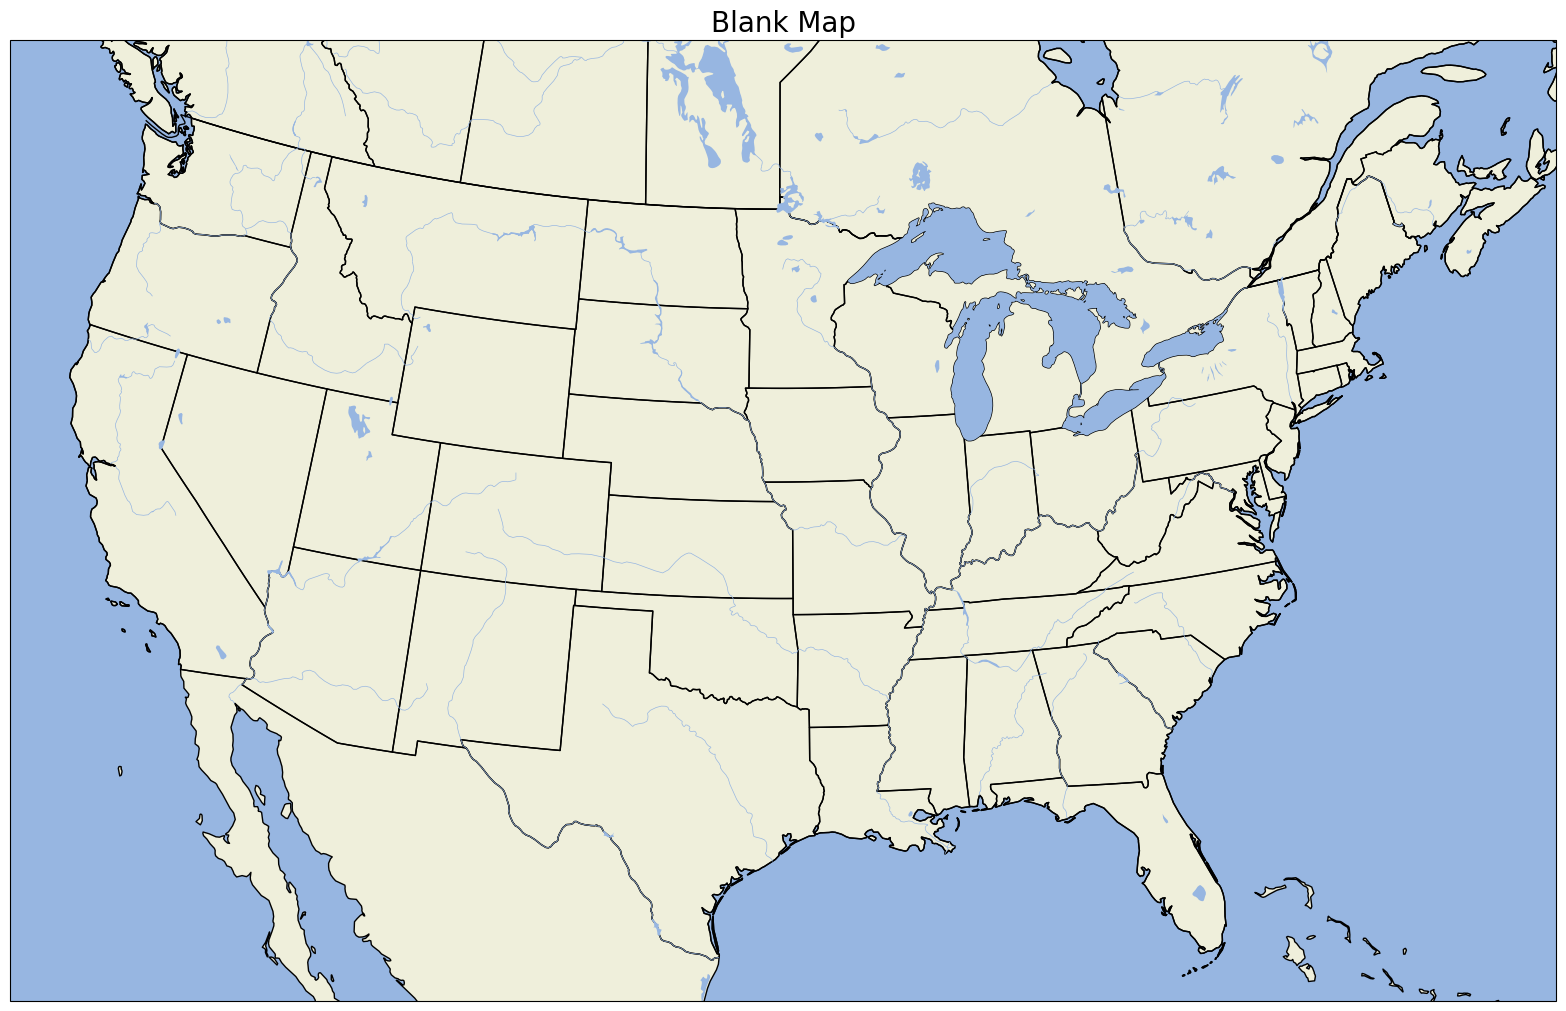

In [7]:
#define coordinate system and projection - specify ccrs so data knows where to be plotted
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35)
crs = ccrs.LambertConformal

#create figure and axes (subplots #, #, # is amount of dimensions in dataset)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), subplot_kw=dict(projection=proj),
                       layout='constrained')


# Add various map elements
ax.add_feature(cfeature.COASTLINE.with_scale("50m"), lw=1) #lw is line width
ax.add_feature(cfeature.STATES.with_scale("50m"), lw=1)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS, lw=0.5)

# Set plot bounds
ax.set_extent((-120, -70, 22, 52))

#set title, call plot
plt.title('Blank Map', fontsize=20)
plt.show() #this should be the final line of code in this cell. 

### Add data to the blank map

Desired time is simplified by using `strftime` to format the date to match the formatting in the time index. The full strftime documentation is linked [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) and a companion cheatsheet is available [here](https://strftime.org). <br>

The datetime entry for desired time is YYYY, M, DD, HH. This can be edited to look at other dates/times within the loaded dataset. <br>
<br>
Unnecessary cfeatures are commented out by selecting the code lines and pressing `control` + `/` .

In [8]:
#select time from dataset
desired_time = datetime(2016, 4, 16, 18).strftime('%Y-%m-%dT%H:%M') #(year, month, day, UTC hour)

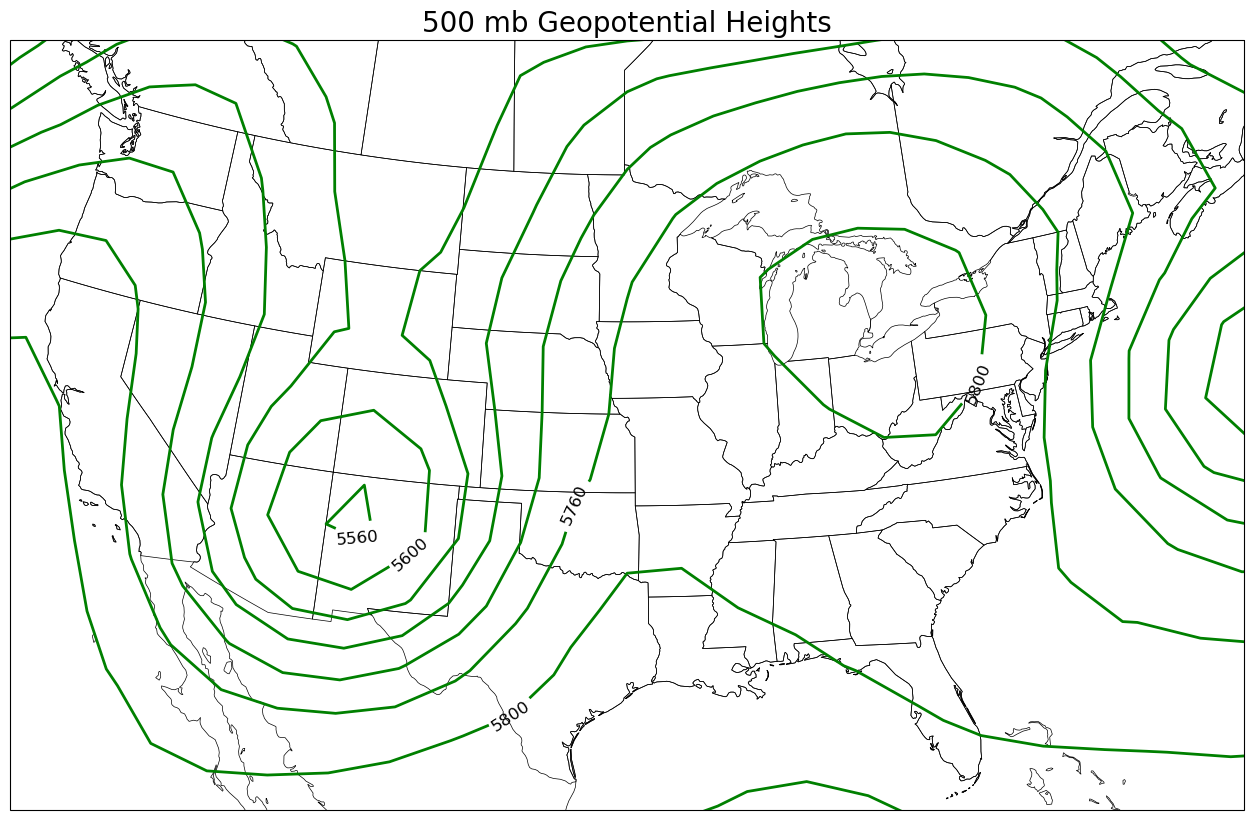

In [9]:
#create 2D meshgrid
lon, lat = np.meshgrid(data_D.lon, data_D.lat)

#create new dataset with timestep we want to look at
time_slice = data_D.sel(time=desired_time)

#assign datapoints
x = time_slice.lon
y = time_slice.lat
z = time_slice.GPH


#define coordinate system and projection - specify ccrs so data knows where to be plotted
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35, standard_parallels=[35])
transform = ccrs.PlateCarree()

# #create figure and axes (subplots #, #, # is amount of dimensions in dataset)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), subplot_kw=dict(projection=proj))

# Add various map elements
ax.add_feature(cfeature.COASTLINE.with_scale("50m"), lw=0.5) #lw is line width
ax.add_feature(cfeature.STATES.with_scale("50m"), lw=0.5)
# ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.RIVERS, lw=0.5)

# Set plot bounds
ax.set_extent((-120, -70, 22, 52))

#plot contour
cs = ax.contour(x, y, z, transform=transform, colors='green', linewidths=2, linestyles='solid', levels=30)
        #levels determines how many contours to display

#add contour labels
ax.clabel(cs, fontsize=12, colors='k', inline=1, inline_spacing=8,
          fmt='%i', rightside_up=True, use_clabeltext=True)


plt.title('500 mb Geopotential Heights', fontsize=20)
plt.show() #this should be the final line of code in this cell. 

### Let's unpack some things we added to the previous code

`lat, lon = np.meshgrid(data_D.lat, data_D.lon)`

> The [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function creates a N-D grid from 1D arrays it is fed. The value of N is however many 1D arrays it is fed. <br>
<br>
> Taking a look at our dataset below, the yellow box indicates the coordinate dimensions. These are all 1D, so they can be used with np.meshgrid to create a a multidimensional grid. <br>
<br>
> In the previous map, we fed it two 1D arrays (latitide and longitude) to created a 2D grid so Matplotlib and Cartopy can understand where to plot our data. 
<br>

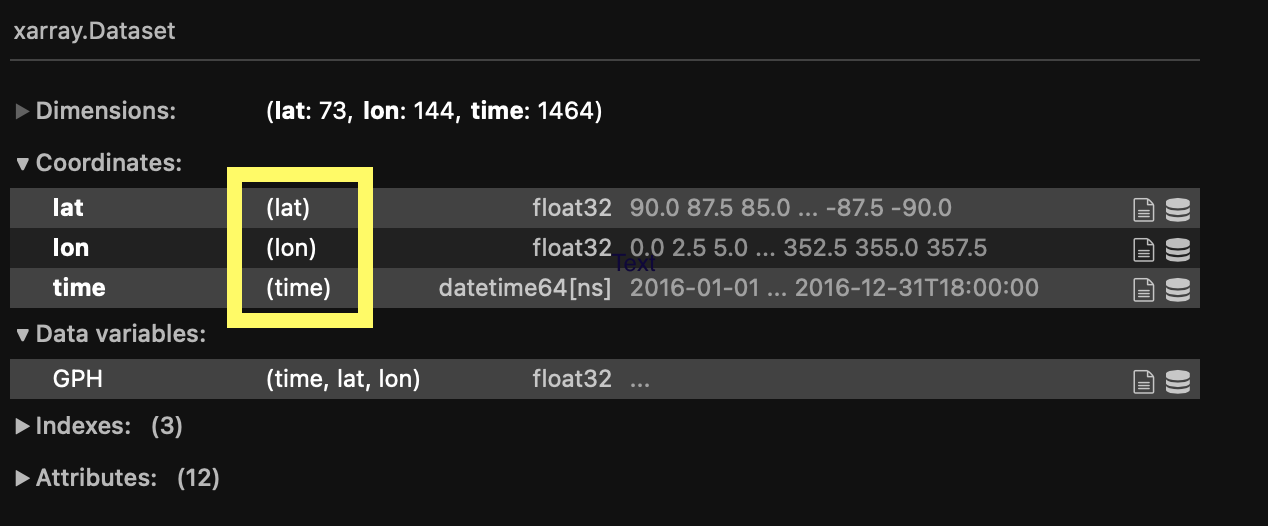

`ax.contour(x, y, z, transform=transform, colors='green', linewidths=2, linestyles='solid', levels=30)`

> This line is what creates our contours. <br>
<br>
The [contour documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html#matplotlib.axes.Axes.contour) has further information on parameters and keywords (*kwargs) available to customize the contours (linewidth, line style, color, frequency, etc.). <br>
<br>Matplotlib also has extensive information on [choosing colors](https://matplotlib.org/stable/tutorials/colors/colormaps.html) including a list of [colorblind friendly resources](https://matplotlib.org/stable/tutorials/colors/colormaps.html#color-vision-deficiencies).



`ax.clabel(cs, fontsize=12, colors='k', inline=1, inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)`

> This line adds labels to our contours and formats them. <br>
<br>
The [clabel documentation](https://matplotlib.org/stable/api/contour_api.html#matplotlib.contour.ContourLabeler.clabel) has further information on parameters and keywords (*kwargs) available to customize the labels (inline, fmt, etc.). <br>




### TEST RANDOM STUFF HERE

## Your second content section
Here we can move on to our second objective, and we can demonstrate

### Subsection to the second section

#### a quick demonstration

##### of further and further

###### header levels

as well $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax (demo below from link),

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Check out [**any number of helpful Markdown resources**](https://www.markdownguide.org/basic-syntax/) for further customizing your notebooks and the [**Jupyter docs**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for Jupyter-specific formatting information. Don't hesitate to ask questions if you have problems getting it to look *just right*.

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!